In [ ]:
# Install rstan, brms, and dependencies if not already installed
packages <- c("Rcpp", "RcppEigen", "inline", "BH", "StanHeaders", "rstan", "brms")
missing <- packages[!(packages %in% installed.packages()[,"Package"])]
if(length(missing) > 0) {
  install.packages(missing, dependencies = TRUE, repos = "https://cloud.r-project.org")
}

In [1]:
# Load necessary libraries
library(brms)
library(tidyverse)
library(ggplot2)
library(dplyr)
library(here)
setwd(here("final_paper_analysis"))

Loading required package: Rcpp

Loading 'brms' package (version 2.22.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar


Warning message:
“package ‘ggplot2’ was built under R version 4.5.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /Users/aschharwood/evaluating_organic_waste_bans



# Data

In [2]:
df <- read.csv("data.csv")
df$sector_name <- as.factor(df$sector_name)
glimpse(df)



Rows: 64
Columns: 8
$ state                          <chr> "california", "california", "california…
$ year                           <int> 1999, 2003, 2008, 2008, 2014, 2018, 201…
$ sector_name                    <fct> sector_combined, sector_combined, secto…
$ log_food_tons                  <dbl> 15.53551, 15.58270, 14.92541, 14.92500,…
$ adjusted_quant_score_linear    <dbl> 0.000000, 0.000000, 0.000000, 0.000000,…
$ inflation_adjusted_tipping_fee <dbl> 47.03000, 47.03100, 53.05004, 53.05004,…
$ pce_scaled                     <dbl> 15.0934096, 17.0308663, 18.8109959, 18.…
$ centered_search                <dbl> 4.2018229, 4.2018229, 4.2018229, 4.2018…


# Models - Residential, ICI, and Total Landfill

### Log-Log with Strong Prior

In [3]:
fit_log_strong_prior <- readRDS('models/strong_prior_model.rds')

In [ ]:
# Code used to fit model
# **Note: I suggest using the rds file, instead of refitting the model**

# prior_final <- c(
#     prior(normal(-0.025, 0.006), class = "b", coef = "adjusted_quant_score_linear")
# )

# fit_log_strong_prior <- brm(
#     formula = log_food_tons ~ adjusted_quant_score_linear +
#         log(pce_scaled) + centered_search +
#         inflation_adjusted_tipping_fee + sector_name +
#         (1 | state),
#     data = df,
#     prior = prior_final,
#     family = gaussian(),
#     iter = 4000, chains = 4, cores = 4,
#     control = list(adapt_delta = .95),
#     save_pars = save_pars(all = TRUE)
# )

#### Results

In [4]:
summary(fit_log_strong_prior)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: log(food_tons_clean) ~ adjusted_quant_score_linear + log(pce_scaled) + centered_search + inflation_adjusted_tipping_fee + sector_name + (1 | state) 
   Data: df (Number of observations: 64) 
  Draws: 4 chains, each with iter = 4000; warmup = 2000; thin = 1;
         total post-warmup draws = 8000

Multilevel Hyperparameters:
~state (Number of levels: 22) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.20      0.06     0.09     0.33 1.00     2341     2556

Regression Coefficients:
                               Estimate Est.Error l-95% CI u-95% CI Rhat
Intercept                         12.33      0.35    11.68    13.02 1.00
adjusted_quant_score_linear       -0.02      0.01    -0.03    -0.01 1.00
logpce_scaled                      1.05      0.07     0.91     1.17 1.00
centered_search                   -0.01      0.00    -0.02     0.00 1.00
inflation_adjusted_tipping_fee   

#### PP_Check

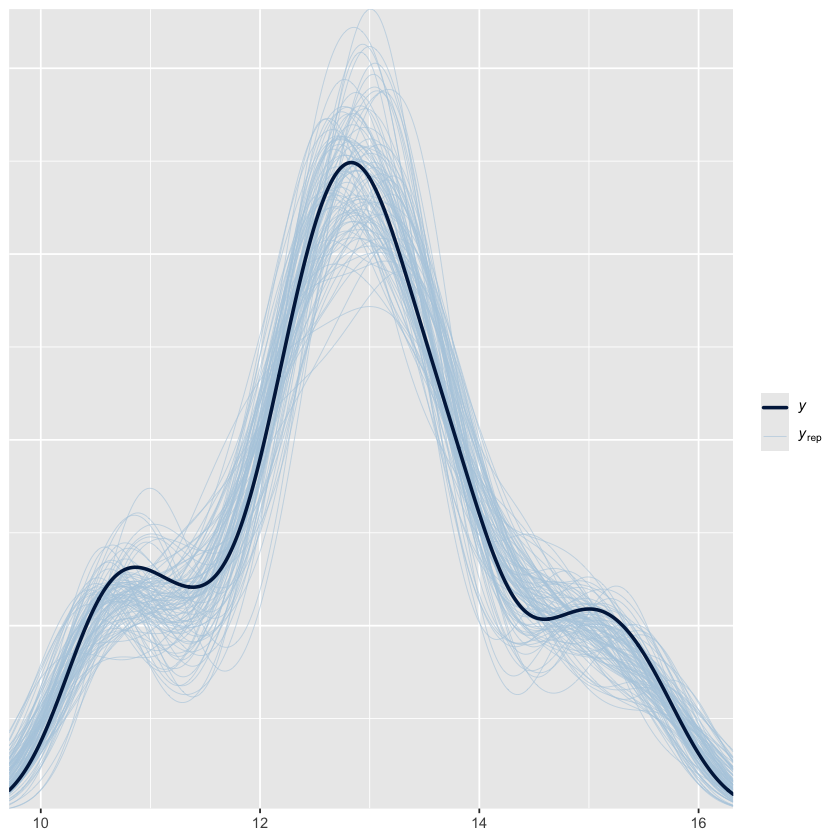

In [5]:
pp_check(fit_log_strong_prior, ndraws = 100)

In [6]:
loo_strong_prior <- loo::loo(fit_log_strong_prior, moment_match = TRUE)

In [7]:
loo_strong_prior


Computed from 8000 by 64 log-likelihood matrix.

         Estimate   SE
elpd_loo     -8.5  6.7
p_loo        16.0  2.9
looic        17.1 13.4
------
MCSE of elpd_loo is 0.1.
MCSE and ESS estimates assume MCMC draws (r_eff in [0.4, 1.5]).

All Pareto k estimates are good (k < 0.7).
See help('pareto-k-diagnostic') for details.

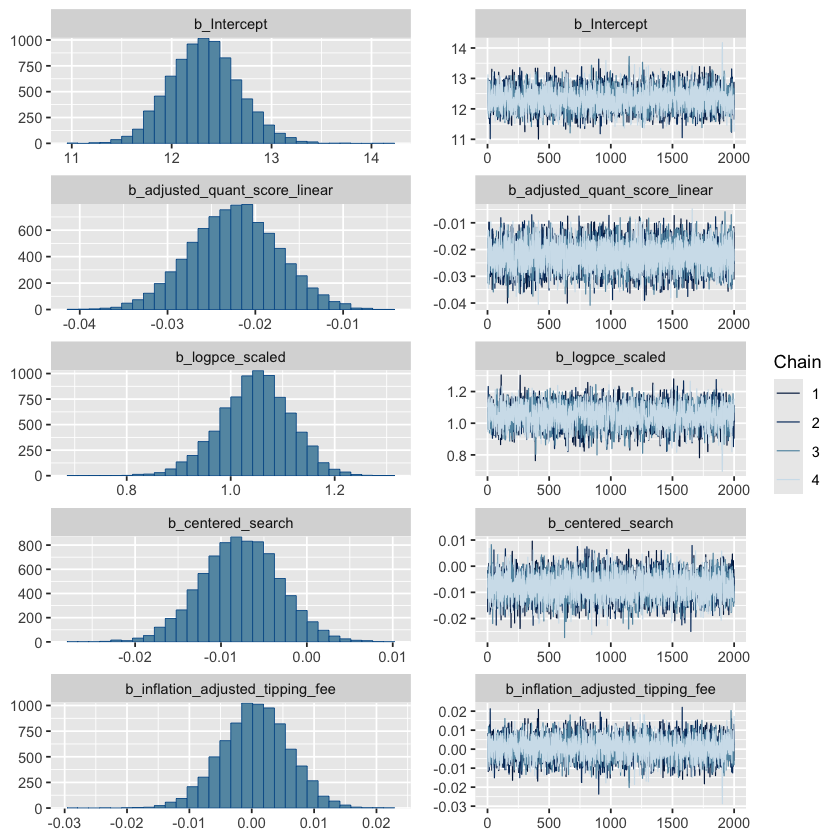

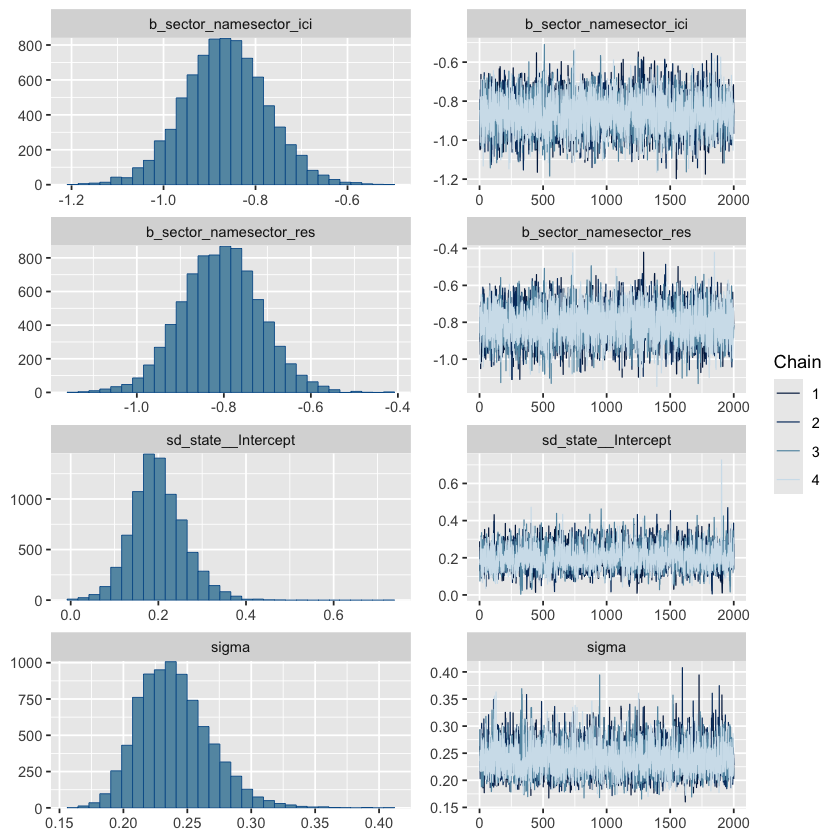

In [10]:
plot(fit_log_strong_prior)

In [8]:
prior_summary(fit_log_strong_prior)

prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,b,,,,,,,,default
"normal(-0.025, 0.006)",b,adjusted_quant_score_linear,,,,,,,user
,b,centered_search,,,,,,,default
,b,inflation_adjusted_tipping_fee,,,,,,,default
,b,logpce_scaled,,,,,,,default
,b,sector_namesector_ici,,,,,,,default
,b,sector_namesector_res,,,,,,,default
"student_t(3, 12.9, 2.5)",Intercept,,,,,,,,default
"student_t(3, 0, 2.5)",sd,,,,,,0,,default


## Log-Log Uninformative Prior

In [ ]:
# Original code used to fit model
# **Note: I suggest using the rds file, instead of refitting the model**

# fit_log_uninformative_prior <- brm(
#     formula = log(food_tons_clean) ~ adjusted_quant_score_linear +
#         log(pce_scaled) + centered_search +
#         inflation_adjusted_tipping_fee + sector_name +
#         (1 | state),
#     data = df,
#     family = gaussian(),
#     iter = 4000, chains = 4, cores = 4,
#     control = list(adapt_delta = .95),
#     save_pars = save_pars(all = TRUE)
# )

In [ ]:
fit_log_uninformative_prior <- readRDS("models/uninformative_prior_model.rds")


### Results

In [ ]:
summary(fit_log_uninformative_prior)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: log(food_tons_clean) ~ adjusted_quant_score_linear + log(pce_scaled) + centered_search + inflation_adjusted_tipping_fee + sector_name + (1 | state) 
   Data: df (Number of observations: 64) 
  Draws: 4 chains, each with iter = 4000; warmup = 2000; thin = 1;
         total post-warmup draws = 8000

Multilevel Hyperparameters:
~state (Number of levels: 22) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.19      0.06     0.08     0.33 1.00     1988     2158

Regression Coefficients:
                               Estimate Est.Error l-95% CI u-95% CI Rhat
Intercept                         12.37      0.33    11.72    13.05 1.00
adjusted_quant_score_linear       -0.02      0.01    -0.03     0.00 1.00
logpce_scaled                      1.05      0.07     0.91     1.17 1.00
centered_search                   -0.01      0.00    -0.02     0.00 1.00
inflation_adjusted_tipping_fee   

### Diagnostics

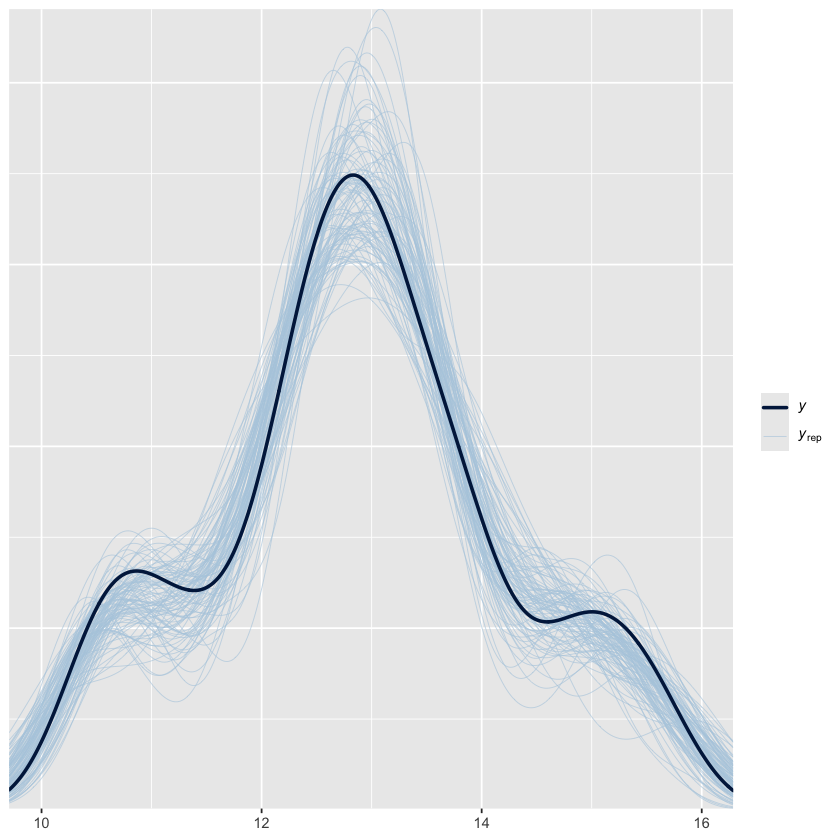

In [ ]:
pp_check(fit_log_uninformative_prior, ndraws = 100)

In [ ]:
loo_log_uninformative <- loo::loo(fit_log_uninformative_prior, moment_match = TRUE)

In [46]:
loo_log_uninformative


Computed from 8000 by 64 log-likelihood matrix.

         Estimate   SE
elpd_loo     -9.4  6.6
p_loo        16.5  2.9
looic        18.8 13.1
------
MCSE of elpd_loo is 0.1.
MCSE and ESS estimates assume MCMC draws (r_eff in [0.4, 1.5]).

All Pareto k estimates are good (k < 0.7).
See help('pareto-k-diagnostic') for details.

# Total Landfill Models Only

## Data

In [65]:
combined_df <- read.csv("total_landfill_data.csv")

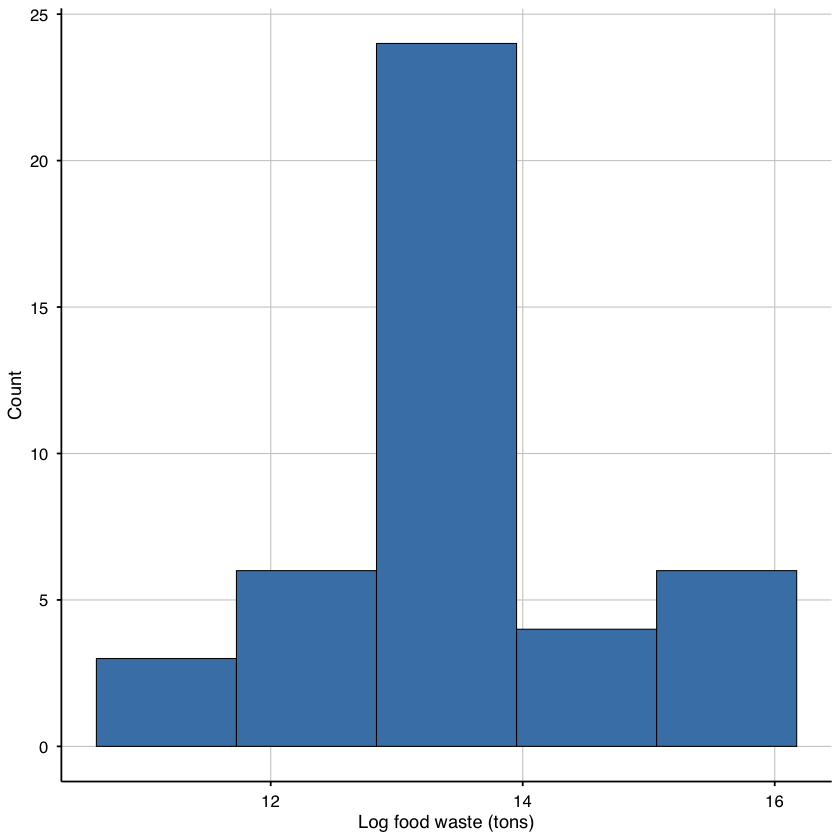

In [59]:
p_hist <- ggplot(combined_df, aes(x = log_food_tons)) +
    geom_histogram(bins = 5, fill = "#4682B4", color = "black", linewidth = 0.3) +
    labs(
        x = "Log food waste (tons)",
        y = "Count"
    ) +
    theme_minimal(base_family = "Helvetica") +
    theme(
        panel.grid.minor = element_blank(),
        panel.grid.major = element_line(linewidth = 0.3, color = "gray80"),
        axis.line = element_line(color = "black", linewidth = 0.5),
        axis.ticks = element_line(color = "black", linewidth = 0.5),
        axis.text = element_text(size = 10, color = "black"),
        axis.title = element_text(size = 11, color = "black"),
        plot.margin = margin(5, 5, 5, 5, "pt"),
        text = element_text(family = "Helvetica")
    )

print(p_hist)

## Model with Prior

In [ ]:
combined_model <- readRDS("models/fit_loglog_strong_combined.rds")

### Results

In [32]:
summary(combined_model)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: log(food_tons_clean) ~ adjusted_quant_score_linear + log(pce_scaled) + centered_search_roll + inflation_adjusted_tipping_fee + (1 | state) 
   Data: combined_df (Number of observations: 43) 
  Draws: 4 chains, each with iter = 4000; warmup = 1000; thin = 1;
         total post-warmup draws = 12000

Multilevel Hyperparameters:
~state (Number of levels: 22) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.17      0.08     0.02     0.32 1.00     2229     3154

Regression Coefficients:
                               Estimate Est.Error l-95% CI u-95% CI Rhat
Intercept                         12.40      0.35    11.73    13.11 1.00
adjusted_quant_score_linear       -0.02      0.01    -0.03    -0.01 1.00
logpce_scaled                      1.06      0.07     0.91     1.19 1.00
centered_search_roll              -0.01      0.00    -0.02     0.00 1.00
inflation_adjusted_tipping_fee  

### Diagnostics

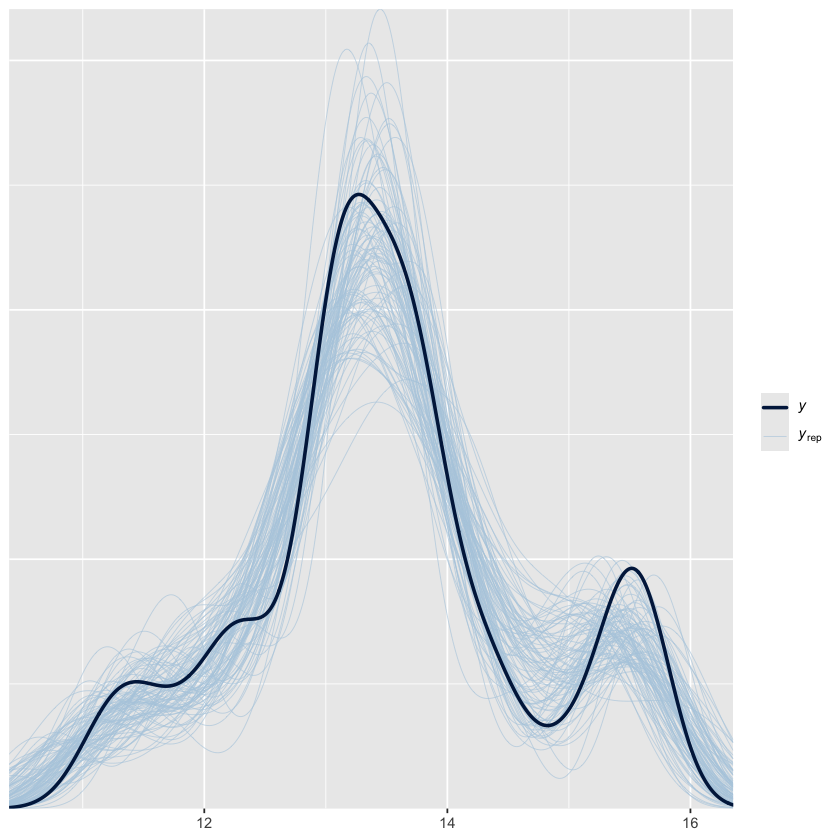

In [34]:
pp_check(combined_model, ndraws = 100)

In [35]:
loo_combined <- loo::loo(combined_model, moment_match = TRUE)
loo_combined




Computed from 12000 by 43 log-likelihood matrix.

         Estimate  SE
elpd_loo     -7.5 4.7
p_loo        12.6 2.3
looic        14.9 9.5
------
MCSE of elpd_loo is 0.1.
MCSE and ESS estimates assume MCMC draws (r_eff in [0.3, 1.5]).

All Pareto k estimates are good (k < 0.7).
See help('pareto-k-diagnostic') for details.

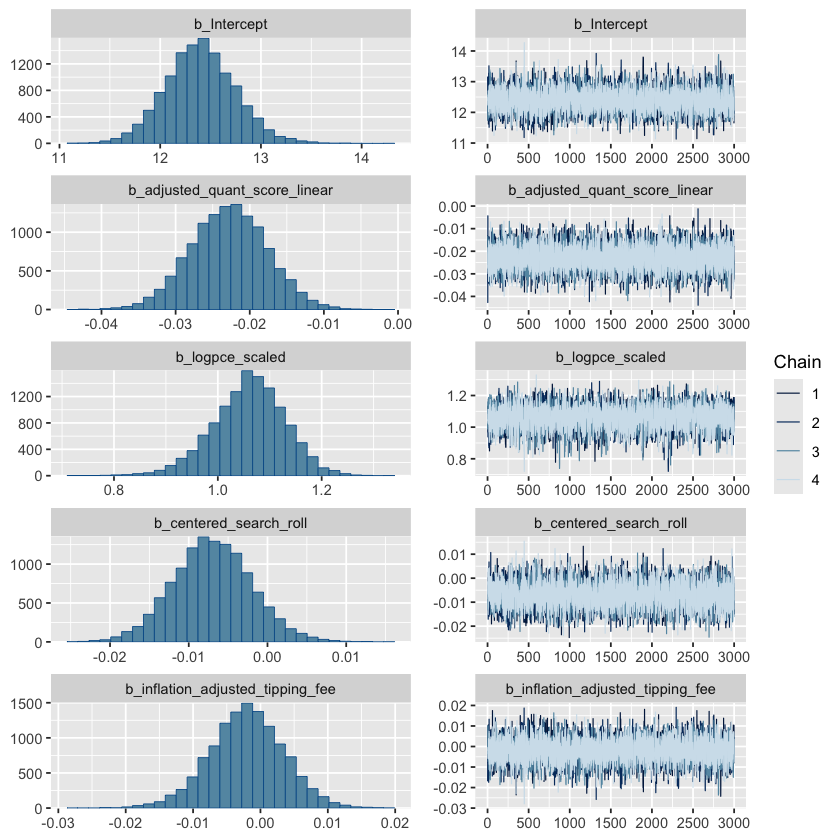

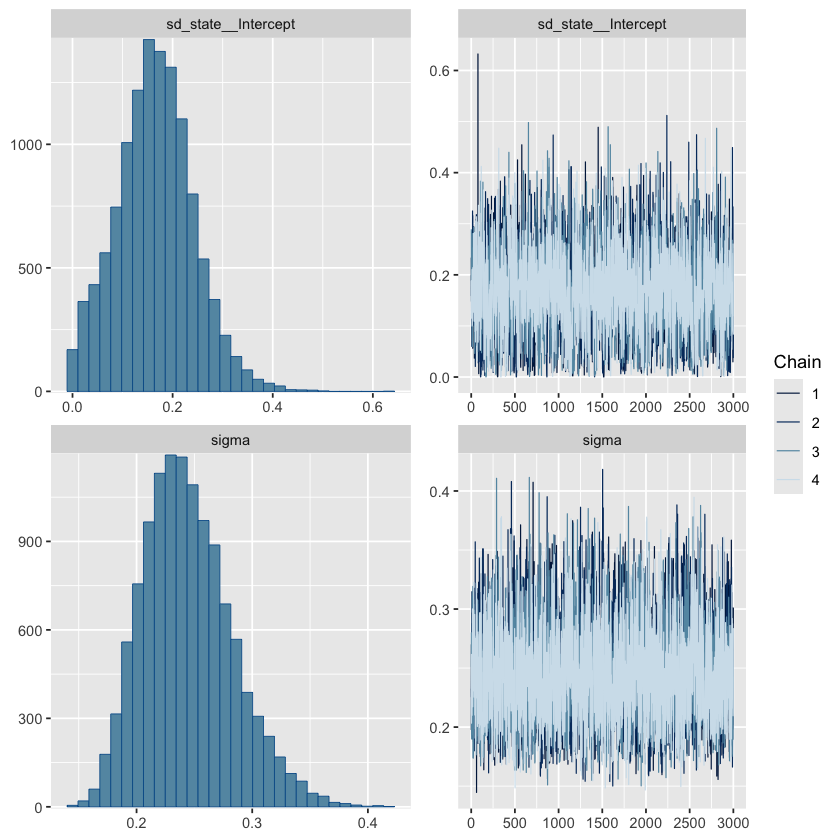

In [36]:
plot(combined_model)


In [37]:
prior_summary(combined_model)

prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,b,,,,,,,,default
"normal(-0.025, 0.006)",b,adjusted_quant_score_linear,,,,,,,user
,b,centered_search_roll,,,,,,,default
,b,inflation_adjusted_tipping_fee,,,,,,,default
,b,logpce_scaled,,,,,,,default
"student_t(3, 13.4, 2.5)",Intercept,,,,,,,,default
"student_t(3, 0, 2.5)",sd,,,,,,0,,default
,sd,,state,,,,,,default
,sd,Intercept,state,,,,,,default


In [39]:
summary(combined_model)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: log(food_tons_clean) ~ adjusted_quant_score_linear + log(pce_scaled) + centered_search_roll + inflation_adjusted_tipping_fee + (1 | state) 
   Data: combined_df (Number of observations: 43) 
  Draws: 4 chains, each with iter = 4000; warmup = 1000; thin = 1;
         total post-warmup draws = 12000

Multilevel Hyperparameters:
~state (Number of levels: 22) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.17      0.08     0.02     0.32 1.00     2229     3154

Regression Coefficients:
                               Estimate Est.Error l-95% CI u-95% CI Rhat
Intercept                         12.40      0.35    11.73    13.11 1.00
adjusted_quant_score_linear       -0.02      0.01    -0.03    -0.01 1.00
logpce_scaled                      1.06      0.07     0.91     1.19 1.00
centered_search_roll              -0.01      0.00    -0.02     0.00 1.00
inflation_adjusted_tipping_fee  

### Posterior Predictions

In [42]:
head(combined_df)

,state,year,food_tons_clean,log_food_tons,pce_scaled,centered_search_roll,inflation_adjusted_tipping_fee,adjusted_quant_score_linear
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,california,2008,6066845.0,15.61835,18.8109959,3.990310,53.05004,0.000000
2,california,2018,5620637.0,15.54196,23.6341499,2.740310,55.20191,11.550000
3,connecticut,2009,320824.0,12.67865,1.8456157,2.406977,71.64352,0.000000
4,connecticut,2015,519832.0,13.16126,2.0025900,-6.676357,71.20000,3.625432
5,delaware,2016,132001.0,11.79056,0.5322474,-9.259690,71.81811,0.000000
6,georgia,2004,665545.6,13.40836,4.2036886,-8.259690,44.13323,0.000000


[1] "Strong Prior Model Results:"
  policy_score        model     median     lower      upper
1            0 Strong Prior   0.000000   0.00000   0.000000
2            4 Strong Prior  -8.703544 -12.37094  -4.948823
3            8 Strong Prior -16.649572 -23.21148  -9.652738
4           12 Strong Prior -23.904013 -32.71094 -14.123864
5           16 Strong Prior -30.527061 -41.03523 -18.373722


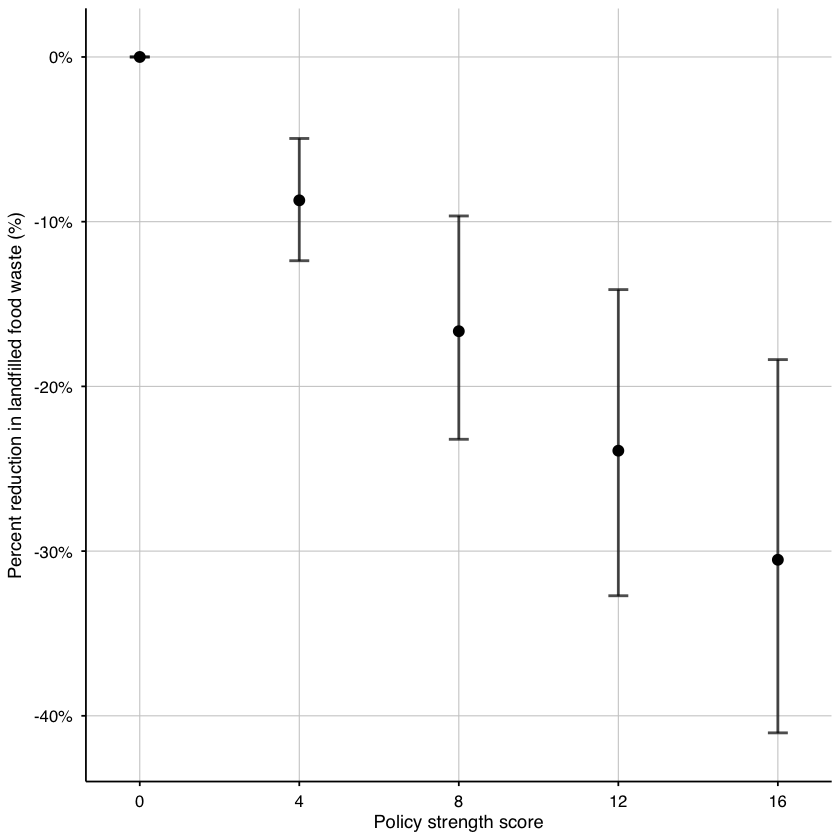

In [ ]:
# Policy strength scores to evaluate
policy_scores <- c(0, 4, 8, 12, 16)

# Function to calculate percent reductions using posterior_epred
calculate_percent_reductions_epred <- function(model, policy_scores, df, model_name) {
    # Create prediction data frame with reference values for other covariates
    pred_data <- data.frame(
        adjusted_quant_score_linear = policy_scores,
        pce_scaled = mean(df$pce_scaled, na.rm = TRUE),
        centered_search_roll = 0, # Centered variable, so 0 is the mean
        inflation_adjusted_tipping_fee = mean(df$inflation_adjusted_tipping_fee, na.rm = TRUE)
    )

    # Get expected predictions (on log scale)
    # re_formula = NA means ignore random effects (state-level)
    preds_log <- posterior_epred(model, newdata = pred_data, re_formula = NA)

    # Transform from log scale to original scale
    preds <- exp(preds_log)

    # Calculate percent reduction relative to score 0
    baseline <- preds[, 1] # Score 0
    percent_reductions <- matrix(NA, nrow = nrow(preds), ncol = ncol(preds))

    for (i in 1:ncol(preds)) {
        percent_reductions[, i] <- 100 * (preds[, i] / baseline - 1)
    }

    # Create summary data frame
    plot_data <- data.frame(
        policy_score = policy_scores,
        model = model_name,
        median = apply(percent_reductions, 2, median),
        lower = apply(percent_reductions, 2, quantile, 0.025),
        upper = apply(percent_reductions, 2, quantile, 0.975)
    )

    return(plot_data)
}

# Calculate for both models
results_strong_prior <- calculate_percent_reductions_epred(
    combined_model,
    policy_scores,
    combined_df,
    "Strong Prior"
)



# ============================================================================
# Plot 1: Strong Prior Model (Publication-ready, no title)
# ============================================================================
# Calculate data range for y-axis (don't extend beyond data)
y_min <- min(results_strong_prior$lower)
y_max <- max(results_strong_prior$upper)
# Add small padding (2% of range)
y_range <- y_max - y_min
y_min_plot <- y_min - 0.02 * y_range
y_max_plot <- y_max + 0.02 * y_range

p1 <- ggplot(results_strong_prior, aes(x = policy_score, y = median)) +
    geom_errorbar(aes(ymin = lower, ymax = upper),
        width = 0.5,
        color = "black",
        linewidth = 0.8,
        alpha = 0.7
    ) +
    geom_point(
        size = 3,
        color = "black",
        shape = 16
    ) +
    scale_x_continuous(
        breaks = policy_scores,
        limits = c(-0.5, 16.5)
    ) +
    scale_y_continuous(
        labels = function(x) paste0(x, "%"),
        limits = c(y_min_plot, y_max_plot)
    ) +
    labs(
        x = "Policy strength score",
        y = "Percent reduction in landfilled food waste (%)"
        # No title, no subtitle - everything goes in caption
    ) +
    theme_minimal(base_family = "Helvetica") +
    theme(
        panel.grid.minor = element_blank(),
        panel.grid.major = element_line(linewidth = 0.3, color = "gray80"),
        axis.line = element_line(color = "black", linewidth = 0.5),
        axis.ticks = element_line(color = "black", linewidth = 0.5),
        axis.text = element_text(size = 10, color = "black"),
        axis.title = element_text(size = 11, color = "black"),
        plot.margin = margin(5, 5, 5, 5, "pt"),
        text = element_text(family = "Helvetica")
    )

print(p1)


print("Strong Prior Model Results:")
print(results_strong_prior)



=== STRONG PRIOR MODEL ===
Weak Policy (Score = 4):


Warning message in sprintf("  Waste reduction: %.0f to %.0f tons\n", reductions_strong$weak$median, :
“one argument not used by format '  Waste reduction: %.0f to %.0f tons
'”


  Waste reduction: 86836 to 48011 tons

Moderate Policy (Score = 8):


Warning message in sprintf("  Waste reduction: %.0f to %.0f tons\n", reductions_strong$moderate$median, :
“one argument not used by format '  Waste reduction: %.0f to %.0f tons
'”


  Waste reduction: 166090 to 93518 tons

Strong Policy (Score = 12):


Warning message in sprintf("  Waste reduction: %.0f to %.0f tons\n", reductions_strong$strong$median, :
“one argument not used by format '  Waste reduction: %.0f to %.0f tons
'”


  Waste reduction: 238334 to 136854 tons

=== UPDATED STATEMENT (Strong Prior Model) ===
Consider a state that disposes of 1,000,000 tons of food waste in landfills annually, represented in Figure X. A state with a weak policy (score = 4) could expect to see its waste drop between 48011 and 128008 tons. A state with a moderate policy (score = 8) could expect to see its waste drop between 93518 and 240848 tons. A state with a strong policy (score = 12), on the other hand, could expect to see a drop anywhere between 136854 and 340110 tons.
Consider a state that disposes of 1,000,000 tons of food waste in landfills annually, represented in Figure X. A state with a weak policy (score = 4) could expect to see its waste drop by 86836 tons (95% CI: 48011 to 128008). A state with a moderate policy (score = 8) could expect to see its waste drop by 166090 tons (95% CI: 93518 to 240848). A state with a strong policy (score = 12), on the other hand, could expect to see a drop of 238334 tons (95% C

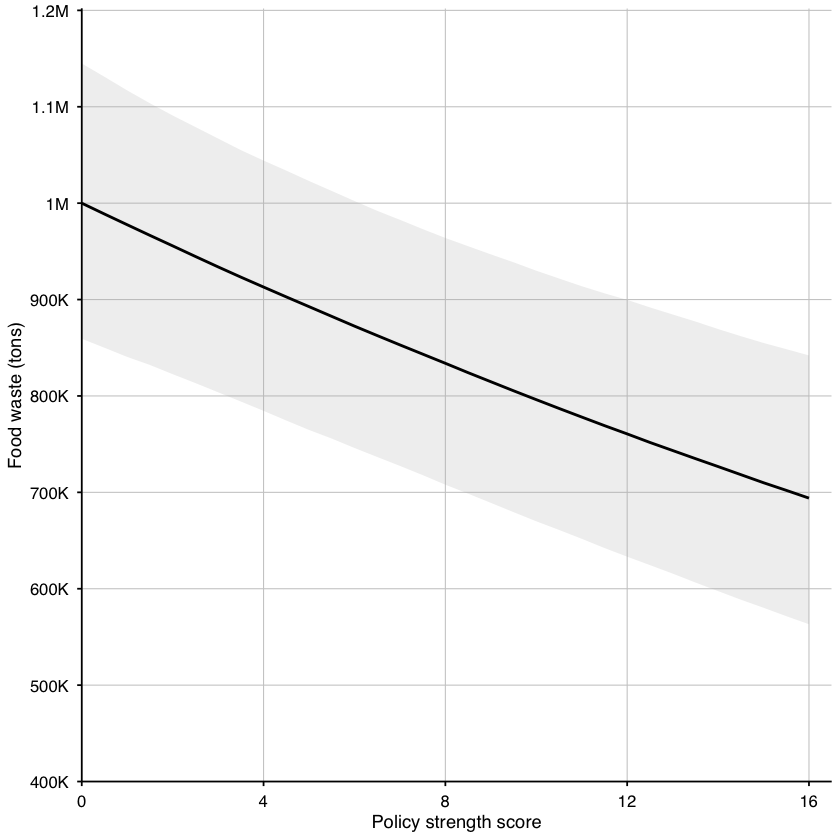

In [48]:
# Policy strength scores to evaluate
policy_scores <- seq(0, 16, by = 0.5) # Fine grid for smooth line

# Function to calculate predicted food waste with normalization
calculate_predicted_waste <- function(model, policy_scores, df, baseline_tons = 1000000) {
    # Create prediction data frame with reference values for other covariates
    pred_data <- data.frame(
        adjusted_quant_score_linear = policy_scores,
        pce_scaled = mean(df$pce_scaled, na.rm = TRUE),
        centered_search_roll = 0,
        inflation_adjusted_tipping_fee = mean(df$inflation_adjusted_tipping_fee, na.rm = TRUE)
    )

    # Get expected predictions (on log scale)
    preds_log <- posterior_epred(model, newdata = pred_data, re_formula = NA)

    # Transform from log scale to original scale
    preds <- exp(preds_log)

    # Normalize to baseline: scale so that score 0 = baseline_tons
    baseline_pred <- preds[, 1] # Predictions at score 0
    normalization_factor <- baseline_tons / median(baseline_pred)

    # Apply normalization to all predictions
    preds_normalized <- preds * normalization_factor

    # Calculate summary statistics for each policy score
    plot_data <- data.frame(
        policy_score = policy_scores,
        median = apply(preds_normalized, 2, median),
        lower = apply(preds_normalized, 2, quantile, 0.025),
        upper = apply(preds_normalized, 2, quantile, 0.975)
    )

    return(plot_data)
}

# Calculate for both models
results_combined_prior <- calculate_predicted_waste(
    combined_model,
    policy_scores,
    combined_df,
    baseline_tons = 1000000
)


# ============================================================================
# Function to calculate waste reductions for specific policy scores
# CORRECTED: Calculate reductions from posterior draws, not summary statistics
# Now includes weak policy (score = 4)
# ============================================================================
calculate_waste_reductions <- function(model, policy_scores_vec, df, weak_score = 4, moderate_score = 8, strong_score = 12, baseline_tons = 1000000) {
    # Create prediction data for baseline (score 0), weak, moderate, and strong
    pred_data <- data.frame(
        adjusted_quant_score_linear = c(0, weak_score, moderate_score, strong_score),
        pce_scaled = mean(df$pce_scaled, na.rm = TRUE),
        centered_search_roll = 0,
        inflation_adjusted_tipping_fee = mean(df$inflation_adjusted_tipping_fee, na.rm = TRUE)
    )

    # Get expected predictions (on log scale)
    preds_log <- posterior_epred(model, newdata = pred_data, re_formula = NA)

    # Transform from log scale to original scale
    preds <- exp(preds_log)

    # Normalize to baseline
    baseline_pred <- preds[, 1] # Predictions at score 0
    normalization_factor <- baseline_tons / median(baseline_pred)
    preds_normalized <- preds * normalization_factor

    # Extract normalized predictions
    baseline_draws <- preds_normalized[, 1] # Score 0
    weak_draws <- preds_normalized[, 2] # Weak score
    moderate_draws <- preds_normalized[, 3] # Moderate score
    strong_draws <- preds_normalized[, 4] # Strong score

    # Calculate reductions for each posterior draw
    weak_reductions <- baseline_draws - weak_draws
    moderate_reductions <- baseline_draws - moderate_draws
    strong_reductions <- baseline_draws - strong_draws

    weak_reduction <- list(
        median = median(weak_reductions),
        lower = quantile(weak_reductions, 0.025),
        upper = quantile(weak_reductions, 0.975)
    )   

    moderate_reduction <- list(
        median = median(moderate_reductions),
        lower = quantile(moderate_reductions, 0.025),
        upper = quantile(moderate_reductions, 0.975)
    )

    strong_reduction <- list(
        median = median(strong_reductions),
        lower = quantile(strong_reductions, 0.025),
        upper = quantile(strong_reductions, 0.975)
    )

    return(list(
        weak = weak_reduction,
        moderate = moderate_reduction,
        strong = strong_reduction,
        weak_score = weak_score,
        moderate_score = moderate_score,
        strong_score = strong_score
    ))
}

# Calculate reductions for both models (using models directly)
reductions_strong <- calculate_waste_reductions(
    combined_model,
    policy_scores,
    combined_df,
    weak_score = 4,
    moderate_score = 8,
    strong_score = 12,
    baseline_tons = 1000000
)



# ============================================================================
# Plot 1: Strong Prior Model (Publication-ready)
# ============================================================================
# Calculate data range for y-axis
y_min <- min(results_combined_prior$lower)
y_max <- max(results_combined_prior$upper)
# Set y-axis minimum to 400K
y_min_plot <- 400000
y_max_plot <- y_max + 0.05 * y_max # Add small padding at top

# Format y-axis breaks - use K and M notation
y_breaks <- pretty(c(y_min_plot, y_max_plot), n = 6)

# Function to format labels as K or M
format_labels <- function(x) {
    ifelse(x >= 1000000,
        paste0(x / 1000000, "M"),
        paste0(x / 1000, "K")
    )
}

p1 <- ggplot(results_combined_prior, aes(x = policy_score, y = median)) +
    geom_ribbon(aes(ymin = lower, ymax = upper),
        alpha = 0.2,
        fill = "gray70",
        color = NA
    ) +
    geom_line(color = "black", linewidth = 0.8) +
    scale_x_continuous(
        breaks = c(0, 4, 8, 12, 16),
        limits = c(-0.5, 16.5),
        expand = expansion(mult = c(0, 0.05))
    ) +
    scale_y_continuous(
        labels = format_labels,
        breaks = y_breaks,
        limits = c(y_min_plot, y_max_plot),
        expand = expansion(mult = c(0, 0.05))
    ) +
    labs(
        x = "Policy strength score",
        y = "Food waste (tons)"
    ) +
    theme_minimal(base_family = "Helvetica") +
    theme(
        panel.grid.minor = element_blank(),
        panel.grid.major = element_line(linewidth = 0.3, color = "gray80"),
        axis.line = element_line(color = "black", linewidth = 0.5),
        axis.ticks = element_line(color = "black", linewidth = 0.5),
        axis.text = element_text(size = 10, color = "black"),
        axis.title = element_text(size = 11, color = "black"),
        plot.margin = margin(5, 5, 5, 5, "pt"),
        text = element_text(family = "Helvetica")
    ) +
    coord_cartesian(xlim = c(0, 16.5), ylim = c(y_min_plot, y_max_plot), expand = FALSE)

print(p1)



# ============================================================================
# Print reduction calculations
# ============================================================================
cat("\n=== STRONG PRIOR MODEL ===\n")
cat(sprintf("Weak Policy (Score = %d):\n", reductions_strong$weak_score))
cat(sprintf(
    "  Waste reduction: %.0f to %.0f tons\n",
    reductions_strong$weak$median,
    reductions_strong$weak$lower,
    reductions_strong$weak$upper
))

cat(sprintf("\nModerate Policy (Score = %d):\n", reductions_strong$moderate_score))
cat(sprintf(
    "  Waste reduction: %.0f to %.0f tons\n",
    reductions_strong$moderate$median,
    reductions_strong$moderate$lower,
    reductions_strong$moderate$upper
))

cat(sprintf("\nStrong Policy (Score = %d):\n", reductions_strong$strong_score))
cat(sprintf(
    "  Waste reduction: %.0f to %.0f tons\n",
    reductions_strong$strong$median,
    reductions_strong$strong$lower,
    reductions_strong$strong$upper
))

# cat("\n=== UNINFORMATIVE PRIOR MODEL ===\n")
# cat(sprintf("Weak Policy (Score = %d):\n", reductions_uninformative$weak_score))
# cat(sprintf("  Waste reduction: %.0f to %.0f tons\n",
#             reductions_uninformative$weak$lower,
#             reductions_uninformative$weak$upper))

# cat(sprintf("\nModerate Policy (Score = %d):\n", reductions_uninformative$moderate_score))
# cat(sprintf("  Waste reduction: %.0f to %.0f tons\n",
#             reductions_uninformative$moderate$lower,
#             reductions_uninformative$moderate$upper))

# cat(sprintf("\nStrong Policy (Score = %d):\n", reductions_uninformative$strong_score))
# cat(sprintf("  Waste reduction: %.0f to %.0f tons\n",
#             reductions_uninformative$strong$lower,
#             reductions_uninformative$strong$upper))

# ============================================================================
# Generate updated statement text
# ============================================================================
cat("\n=== UPDATED STATEMENT (Strong Prior Model) ===\n")
cat(sprintf(
    "Consider a state that disposes of 1,000,000 tons of food waste in landfills annually, represented in Figure X. A state with a weak policy (score = %d) could expect to see its waste drop between %.0f and %.0f tons. A state with a moderate policy (score = %d) could expect to see its waste drop between %.0f and %.0f tons. A state with a strong policy (score = %d), on the other hand, could expect to see a drop anywhere between %.0f and %.0f tons.\n",
    reductions_strong$weak_score,
    round(reductions_strong$weak$lower),
    round(reductions_strong$weak$upper),
    reductions_strong$moderate_score,
    round(reductions_strong$moderate$lower),
    round(reductions_strong$moderate$upper),
    reductions_strong$strong_score,
    round(reductions_strong$strong$lower),
    round(reductions_strong$strong$upper)
))
cat(sprintf(
    "Consider a state that disposes of 1,000,000 tons of food waste in landfills annually, represented in Figure X. A state with a weak policy (score = %d) could expect to see its waste drop by %.0f tons (95%% CI: %.0f to %.0f). A state with a moderate policy (score = %d) could expect to see its waste drop by %.0f tons (95%% CI: %.0f to %.0f). A state with a strong policy (score = %d), on the other hand, could expect to see a drop of %.0f tons (95%% CI: %.0f to %.0f).\n",
    reductions_strong$weak_score,
    round(reductions_strong$weak$median),
    round(reductions_strong$weak$lower),
    round(reductions_strong$weak$upper),
    reductions_strong$moderate_score,
    round(reductions_strong$moderate$median),
    round(reductions_strong$moderate$lower),
    round(reductions_strong$moderate$upper),
    reductions_strong$strong_score,
    round(reductions_strong$strong$median),
    round(reductions_strong$strong$lower),
    round(reductions_strong$strong$upper)
))

## Model without Prior

In [51]:
head(combined_df)

,state,year,food_tons_clean,log_food_tons,pce_scaled,centered_search_roll,inflation_adjusted_tipping_fee,adjusted_quant_score_linear
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,california,2008,6066845.0,15.61835,18.8109959,3.990310,53.05004,0.000000
2,california,2018,5620637.0,15.54196,23.6341499,2.740310,55.20191,11.550000
3,connecticut,2009,320824.0,12.67865,1.8456157,2.406977,71.64352,0.000000
4,connecticut,2015,519832.0,13.16126,2.0025900,-6.676357,71.20000,3.625432
5,delaware,2016,132001.0,11.79056,0.5322474,-9.259690,71.81811,0.000000
6,georgia,2004,665545.6,13.40836,4.2036886,-8.259690,44.13323,0.000000


In [ ]:


# combined_model_no_prior <- brm(
#     formula = log(food_tons_clean) ~ adjusted_quant_score_linear +
#         log(pce_scaled) + centered_search_roll +
#         inflation_adjusted_tipping_fee +
#         (1 | state),
#     data = combined_df,
#     family = gaussian(),
#     iter = 4000, chains = 4, cores = 4,
#     control = list(adapt_delta = .95),
#     save_pars = save_pars(all = TRUE)
# )
# saveRDS(combined_model_no_prior, "models/combined_model_no_prior.rds")

Compiling Stan program...

Start sampling



In [ ]:
combined_model_no_prior <- readRDS("models/combined_model_no_prior.rds")

### Results

In [53]:
summary(combined_model_no_prior)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: log(food_tons_clean) ~ adjusted_quant_score_linear + log(pce_scaled) + centered_search_roll + inflation_adjusted_tipping_fee + (1 | state) 
   Data: combined_df (Number of observations: 43) 
  Draws: 4 chains, each with iter = 4000; warmup = 2000; thin = 1;
         total post-warmup draws = 8000

Multilevel Hyperparameters:
~state (Number of levels: 22) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     0.16      0.08     0.01     0.32 1.00     1501     2345

Regression Coefficients:
                               Estimate Est.Error l-95% CI u-95% CI Rhat
Intercept                         12.44      0.35    11.80    13.16 1.00
adjusted_quant_score_linear       -0.02      0.01    -0.04     0.00 1.00
logpce_scaled                      1.06      0.07     0.92     1.18 1.00
centered_search_roll              -0.01      0.00    -0.02     0.00 1.00
inflation_adjusted_tipping_fee   

### Diagnostics

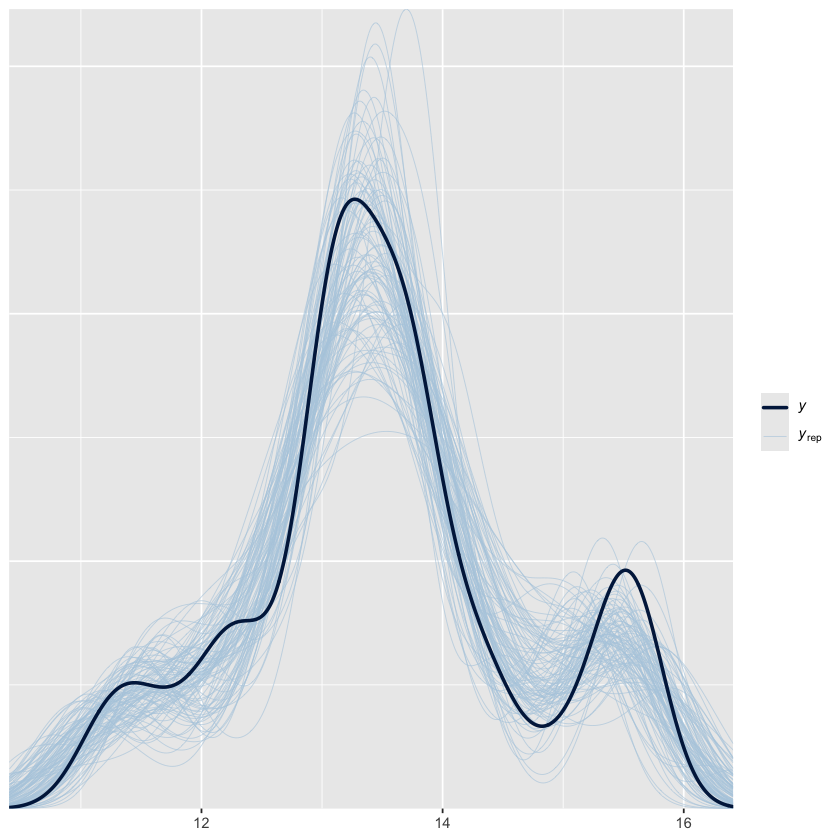

In [54]:
pp_check(combined_model_no_prior, ndraws = 100)

In [ ]:
loo_combined_no_prior <- loo::loo(combined_model_no_prior, moment_match = TRUE)
loo_combined_no_prior


Computed from 8000 by 43 log-likelihood matrix.

         Estimate  SE
elpd_loo     -8.0 4.4
p_loo        12.3 2.2
looic        15.9 8.8
------
MCSE of elpd_loo is 0.1.
MCSE and ESS estimates assume MCMC draws (r_eff in [0.3, 1.4]).

All Pareto k estimates are good (k < 0.7).
See help('pareto-k-diagnostic') for details.

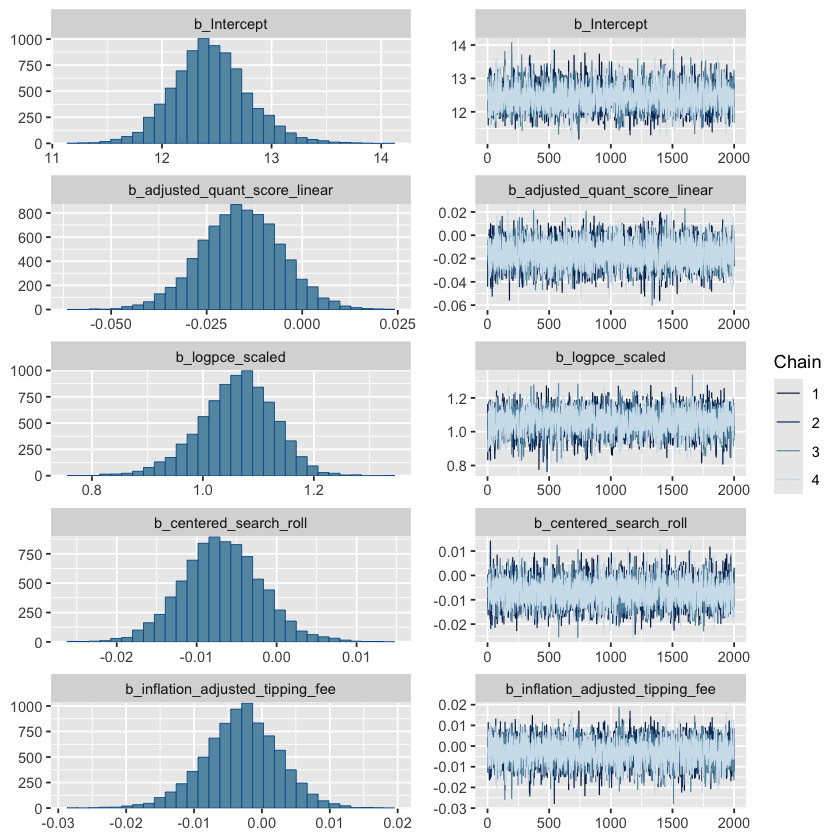

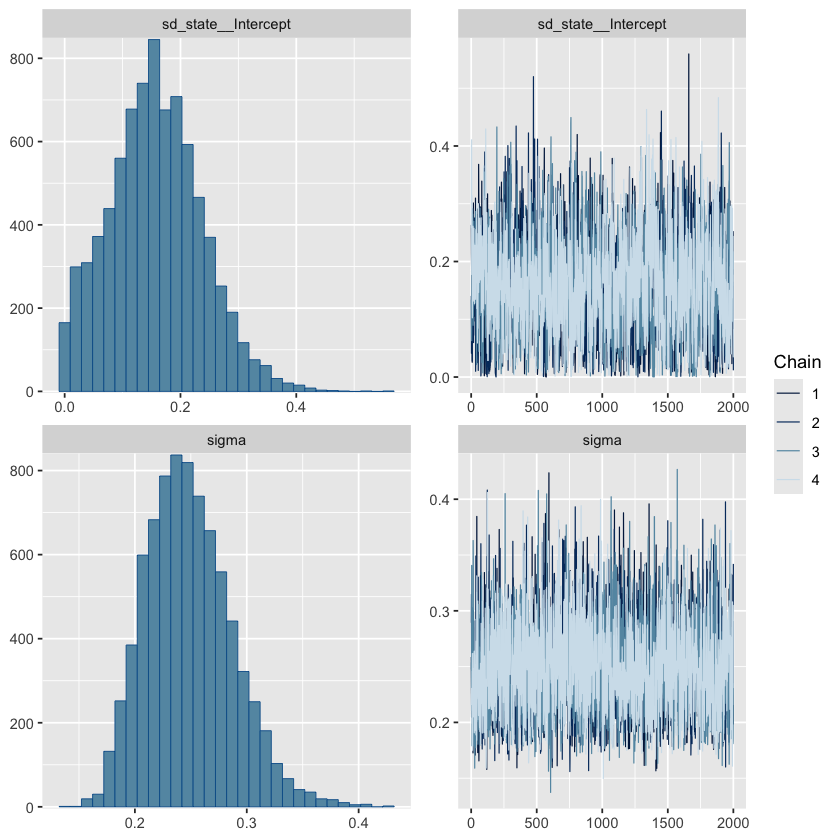

In [56]:
plot(combined_model_no_prior)

### Posterior Predictions